# Polo's Workspace

## Introduction
The data set was donated to us by an unnamed company handling flight ticket reservations. The data is thin, it contains
<ul>
<li> the date of departure
<li> the departure airport
<li> the arrival airport
<li> the mean and standard deviation of the number of weeks of the reservations made before the departure date
<li> a field called <code>log_PAX</code> which is related to the number of passengers (the actual number were changed for privacy reasons)
</ul>

The goal is to predict the <code>log_PAX</code> column. The prediction quality is measured by RMSE. 

The data is obviously limited, but since data and location informations are available, it can be joined to external data sets. <b>The challenge in this RAMP is to find good data that can be correlated to flight traffic</b>.

In [1]:
%matplotlib inline
import imp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
import seaborn as sns; sns.set()

## We load the data and vizualize

In [2]:
problem = imp.load_source('', 'problem.py')
X_df, y_array = problem.get_train_data()

In [3]:
print('first date: ', min(X_df['DateOfDeparture']))
print('last date: ', max(X_df['DateOfDeparture']))

first date:  2011-09-01
last date:  2013-03-05


In [4]:
X_df.head(10)

,DateOfDeparture,Departure,Arrival,WeeksToDeparture,std_wtd
0,2012-06-19,ORD,DFW,12.875000,9.812647
1,2012-09-10,LAS,DEN,14.285714,9.466734
2,2012-10-05,DEN,LAX,10.863636,9.035883
3,2011-10-09,ATL,ORD,11.480000,7.990202
4,2012-02-21,DEN,SFO,11.450000,9.517159
5,2013-01-22,ATL,MCO,10.363636,8.232025
6,2011-10-20,SFO,LAS,15.266667,9.808277
7,2012-01-28,EWR,ORD,8.588235,6.165010
8,2012-05-27,ATL,CLT,10.238095,6.609877
9,2013-02-22,ATL,DEN,8.294118,5.542616


In [5]:
y_array[:10]

array([12.33129622, 10.77518151, 11.08317675, 11.16926784, 11.26936373,
       12.07364919, 11.17393612,  9.5999524 ,  9.17564514, 10.73431968])

{'whiskers': [<matplotlib.lines.Line2D at 0x10bb4fcc0>,
 'caps': [<matplotlib.lines.Line2D at 0x10bb6d438>,
 'boxes': [<matplotlib.lines.Line2D at 0x10bb4fb38>],
 'medians': [<matplotlib.lines.Line2D at 0x10bb6db38>],
 'fliers': [<matplotlib.lines.Line2D at 0x10bb6deb8>],
 'means': []}

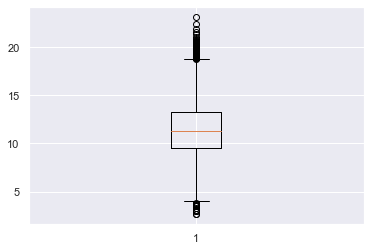

In [6]:
#Boxplot mean
plt.boxplot(X_df.iloc[:, 3])

{'whiskers': [<matplotlib.lines.Line2D at 0x10bbb0780>,
 'caps': [<matplotlib.lines.Line2D at 0x10bbb0ef0>,
 'boxes': [<matplotlib.lines.Line2D at 0x10bbb05f8>],
 'medians': [<matplotlib.lines.Line2D at 0x10bbba630>],
 'fliers': [<matplotlib.lines.Line2D at 0x10bbba9b0>],
 'means': []}

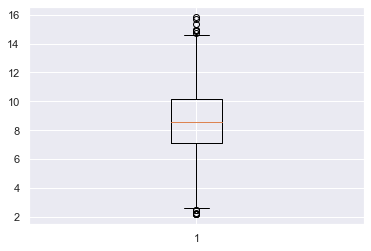

In [7]:
#Boxplot standard deviation
plt.boxplot(X_df.iloc[:, 4])

In [8]:
X_df.describe()

,WeeksToDeparture,std_wtd
count,8902.000000,8902.000000
mean,11.446469,8.617773
std,2.787140,2.139604
min,2.625000,2.160247
25%,9.523810,7.089538
50%,11.300000,8.571116
75%,13.240000,10.140521
max,23.163265,15.862216


In [9]:
X_df['Departure'].unique()

array(['ORD', 'LAS', 'DEN', 'ATL', 'SFO', 'EWR', 'IAH', 'LAX', 'DFW',
       'SEA', 'JFK', 'PHL', 'MIA', 'DTW', 'BOS', 'MSP', 'CLT', 'MCO',
       'PHX', 'LGA'], dtype=object)

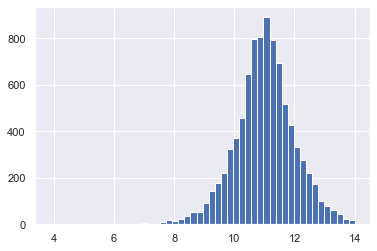

In [10]:
plt.hist(y_array, bins=50);

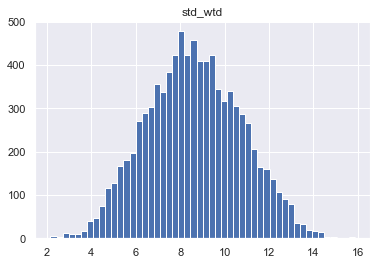

In [11]:
X_df.hist('std_wtd', bins=50);

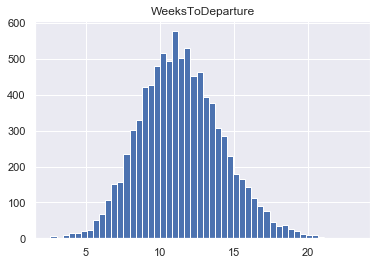

In [12]:
X_df.hist('WeeksToDeparture', bins=50);

In [13]:
print(y_array.mean())
print(y_array.std())

10.99904767212102
0.9938894125318564


## We download the external dataset

In [24]:
X_encoded = X_df
external_data = pd.read_csv('submissions/starting_kit/external_data.csv')
external_data = external_data.rename(
            columns={'Date': 'DateOfDeparture', 'AirPort': 'Arrival'})
X_encoded = pd.merge(
            X_encoded, external_data, how='left',
            left_on=['DateOfDeparture', 'Arrival'],
            right_on=['DateOfDeparture', 'Arrival'],
            sort=False)
X_encoded.head()

,DateOfDeparture,Departure,Arrival,WeeksToDeparture,std_wtd,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressurehPa,Mean Sea Level PressurehPa,Min Sea Level PressurehPa,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
0,2012-06-19,ORD,DFW,12.875000,9.812647,34,29,24,22,21,19,82,63,44,1012,1010,1009,16,16,16,48,29,60.0,0.00,5,NaN,161
1,2012-09-10,LAS,DEN,14.285714,9.466734,33,25,16,-2,-6,-8,21,14,7,1011,1008,1005,16,16,16,35,15,42.0,0.00,3,NaN,207
2,2012-10-05,DEN,LAX,10.863636,9.035883,22,19,16,17,16,14,93,77,61,1018,1016,1014,16,13,8,24,8,29.0,0.00,5,Fog,266
3,2011-10-09,ATL,ORD,11.480000,7.990202,27,19,11,12,10,9,83,58,33,1028,1026,1024,16,16,16,23,6,29.0,0.00,1,NaN,93
4,2012-02-21,DEN,SFO,11.450000,9.517159,16,12,8,10,8,7,93,79,64,1027,1025,1024,16,12,3,24,8,29.0,0.00,7,NaN,300


## organizatio of the data set

In [25]:
X_encoded = X_encoded.drop(['Max Sea Level PressurehPa',
                            'Mean Sea Level PressurehPa', 
                            'Min Sea Level PressurehPa', 
                            'WindDirDegrees', 'Max Gust SpeedKm/h'], axis=1)
df = X_encoded[[]]
X_encoded.describe()

,WeeksToDeparture,std_wtd,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,CloudCover
count,8902.000000,8902.000000,8902.000000,8902.000000,8902.000000,8902.000000,8902.000000,8902.000000,8902.000000,8902.000000,8902.000000,8902.000000,8902.000000,8902.000000,8902.000000,8902.000000,8772.000000,8902.000000
mean,11.446469,8.617773,19.164907,14.342170,9.253426,8.786228,5.792968,2.490115,80.290609,62.307684,43.714896,15.933610,14.661200,11.502359,31.028758,14.027971,40.655837,4.317906
std,2.787140,2.139604,9.930519,9.292267,9.095286,8.951706,9.512824,10.296834,17.072600,16.700600,18.990429,0.663945,2.538861,5.731606,10.648602,6.344225,13.842996,2.394577
min,2.625000,2.160247,-19.000000,-21.000000,-25.000000,-25.000000,-27.000000,-29.000000,5.000000,4.000000,1.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,0.000000
25%,9.523810,7.089538,12.000000,8.000000,3.000000,2.000000,-1.000000,-5.000000,73.000000,53.000000,30.000000,16.000000,14.000000,6.000000,24.000000,9.000000,32.000000,2.000000
50%,11.300000,8.571116,19.000000,14.000000,10.000000,10.000000,7.000000,3.000000,85.000000,65.000000,43.000000,16.000000,16.000000,16.000000,29.000000,13.000000,39.000000,4.000000
75%,13.240000,10.140521,27.000000,21.000000,16.000000,16.000000,13.000000,11.000000,93.000000,74.000000,57.000000,16.000000,16.000000,16.000000,37.000000,17.000000,48.000000,6.000000
max,23.163265,15.862216,46.000000,39.000000,33.000000,27.000000,25.000000,23.000000,100.000000,100.000000,100.000000,16.000000,16.000000,16.000000,90.000000,58.000000,200.000000,8.000000


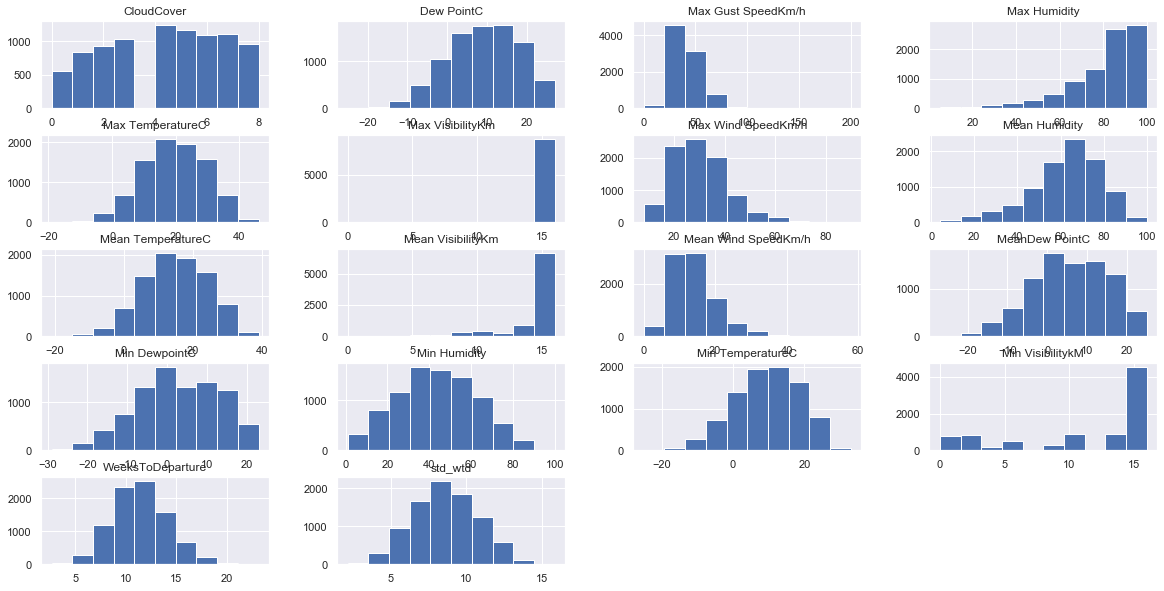

In [26]:
_ = X_encoded.hist(figsize=(20, 10))

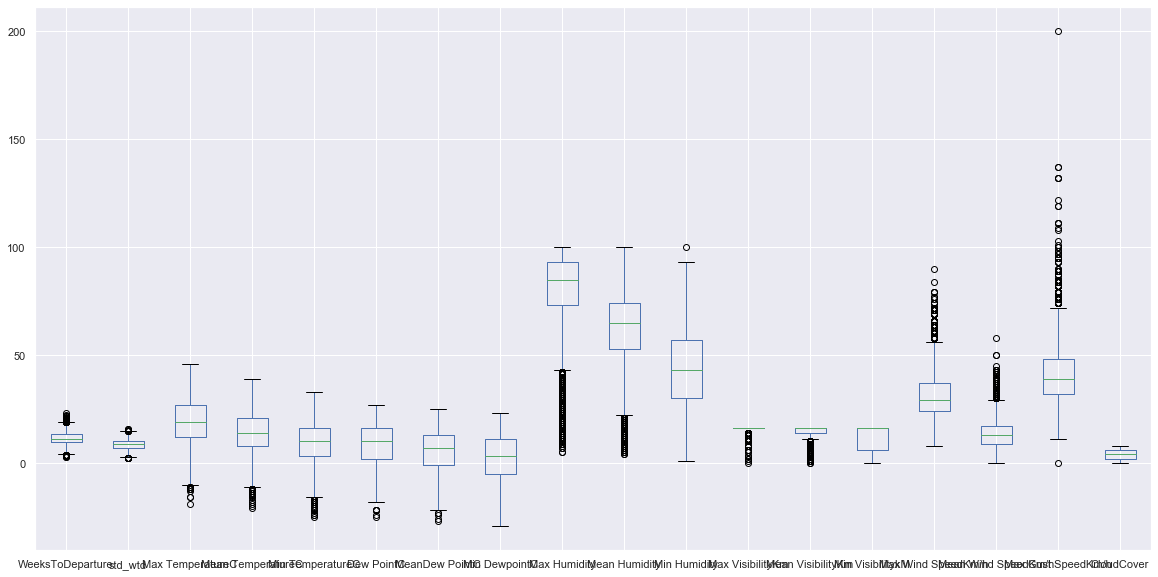

In [16]:
plt.subplots(figsize=(20, 10))
X_encoded.boxplot()

In [20]:
X_encoded.loc[:,'Precipitationmm']

0        0.00
1        0.00
2        0.00
3        0.00
4        0.00
5        0.00
6        0.00
7        1.27
8           T
9        0.00
10       1.27
11      20.07
12       0.00
13       0.00
14       0.00
15       0.00
16       0.00
17       0.00
18          T
19       0.00
20       0.25
21       2.29
22      60.96
23       0.00
24       0.00
25      92.71
26          T
27       0.00
28       0.00
29       0.00
        ...  
8872     5.84
8873     0.00
8874     0.00
8875        T
8876     1.02
8877     0.51
8878     0.00
8879     0.00
8880        T
8881     0.00
8882     0.00
8883     0.00
8884     0.00
8885     2.03
8886     0.00
8887    30.99
8888     0.00
8889     0.76
8890     0.00
8891        T
8892     0.76
8893     0.00
8894     0.00
8895     1.52
8896     0.00
8897     0.00
8898     0.00
8899     0.00
8900     0.25
8901     0.00
Name: Precipitationmm, Length: 8902, dtype: object

In [ ]:
X_encoded['DateOfDeparture'] = pd.to_datetime(X_encoded['DateOfDeparture'])
X_encoded['year'] = X_encoded['DateOfDeparture'].dt.year
X_encoded['month'] = X_encoded['DateOfDeparture'].dt.month
X_encoded['day'] = X_encoded['DateOfDeparture'].dt.day
X_encoded['weekday'] = X_encoded['DateOfDeparture'].dt.weekday
X_encoded['week'] = X_encoded['DateOfDeparture'].dt.week
X_encoded['n_days'] = X_encoded['DateOfDeparture'].apply(lambda date: (date - pd.to_datetime("1970-01-01")).days)

X_encoded = X_encoded.join(pd.get_dummies(X_encoded['year'], prefix='y'))
X_encoded = X_encoded.join(pd.get_dummies(X_encoded['month'], prefix='m'))
X_encoded = X_encoded.join(pd.get_dummies(X_encoded['day'], prefix='d'))
X_encoded = X_encoded.join(pd.get_dummies(X_encoded['weekday'], prefix='wd'))
X_encoded = X_encoded.join(pd.get_dummies(X_encoded['week'], prefix='w'))

X_encoded = X_encoded.drop(['year', 'month', 'day', 'weekday', 'week', 'n_days'], axis=1)

X_encoded = X_encoded.drop('DateOfDeparture', axis=1)
X_array = X_encoded.values